In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import tensorflow as tf
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('wordnet')
from tqdm import tqdm
stop_words = set(stopwords.words('english'))
import random
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
# Set seed value
SEED = 42

# Python built-in random
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Optional: for full determinism (if needed)
os.environ['PYTHONHASHSEED'] = str(SEED)

%matplotlib inline

2025-07-12 17:47:18.470477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752342438.661938      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752342438.714209      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_

In [2]:
df=pd.read_csv("/kaggle/input/videos-data/Videos_data.csv")

In [3]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/stormtrooper_mask.png"))

In [4]:
df.drop(columns=["Unnamed: 0","Video Id"],axis=1,inplace=True)

In [5]:
df["text"]=df["Title"]+" "+df["Description"]

In [6]:
df.drop(columns=["Title","Description"],axis=1,inplace=True)

In [7]:
df.head()

,Category,text
0,travel,Ep 1| Travelling through North East India | Of...
1,travel,How do I travel so much ! How do I earn money!...
2,travel,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE ...
3,travel,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...
4,travel,5 Steps to Becoming a Travel Blogger Travel bl...


In [8]:
df.shape

(10333, 2)

In [9]:
df.isnull().sum()

Category      0
text        334
dtype: int64

In [10]:
mode=df["text"].mode()[0]
df["text"]=df["text"].fillna(mode)

In [11]:
df.isnull().sum()

Category    0
text        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10333 entries, 0 to 10332
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  10333 non-null  object
 1   text      10333 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [13]:
df.head()

,Category,text
0,travel,Ep 1| Travelling through North East India | Of...
1,travel,How do I travel so much ! How do I earn money!...
2,travel,TRAVEL VLOG ∙ Welcome to Bali | PRISCILLA LEE ...
3,travel,GOA TRAVEL DIARY | FOUR DAYS IN GOA | TRAVEL O...
4,travel,5 Steps to Becoming a Travel Blogger Travel bl...


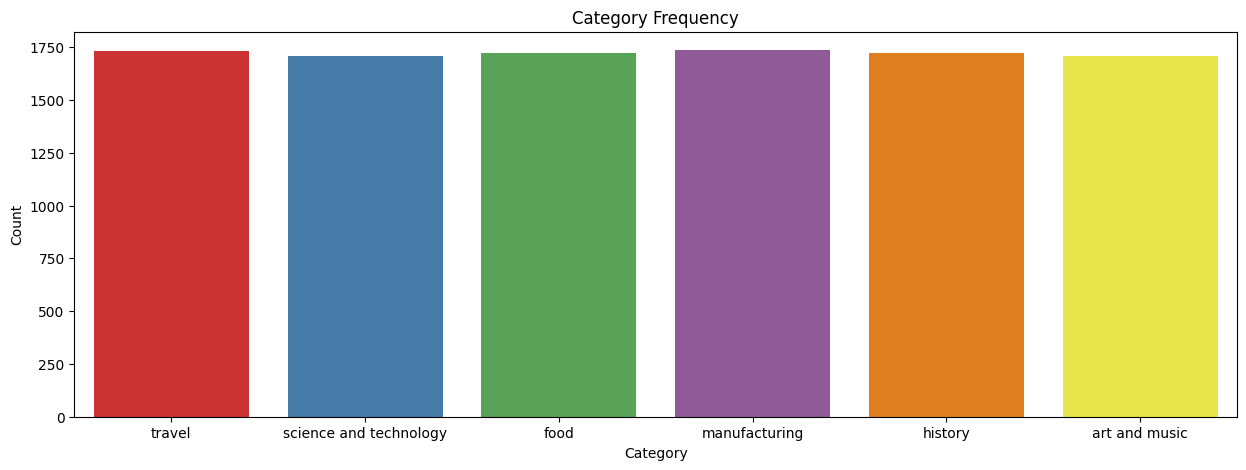

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=df,palette="Set1")
plt.title('Category Frequency')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

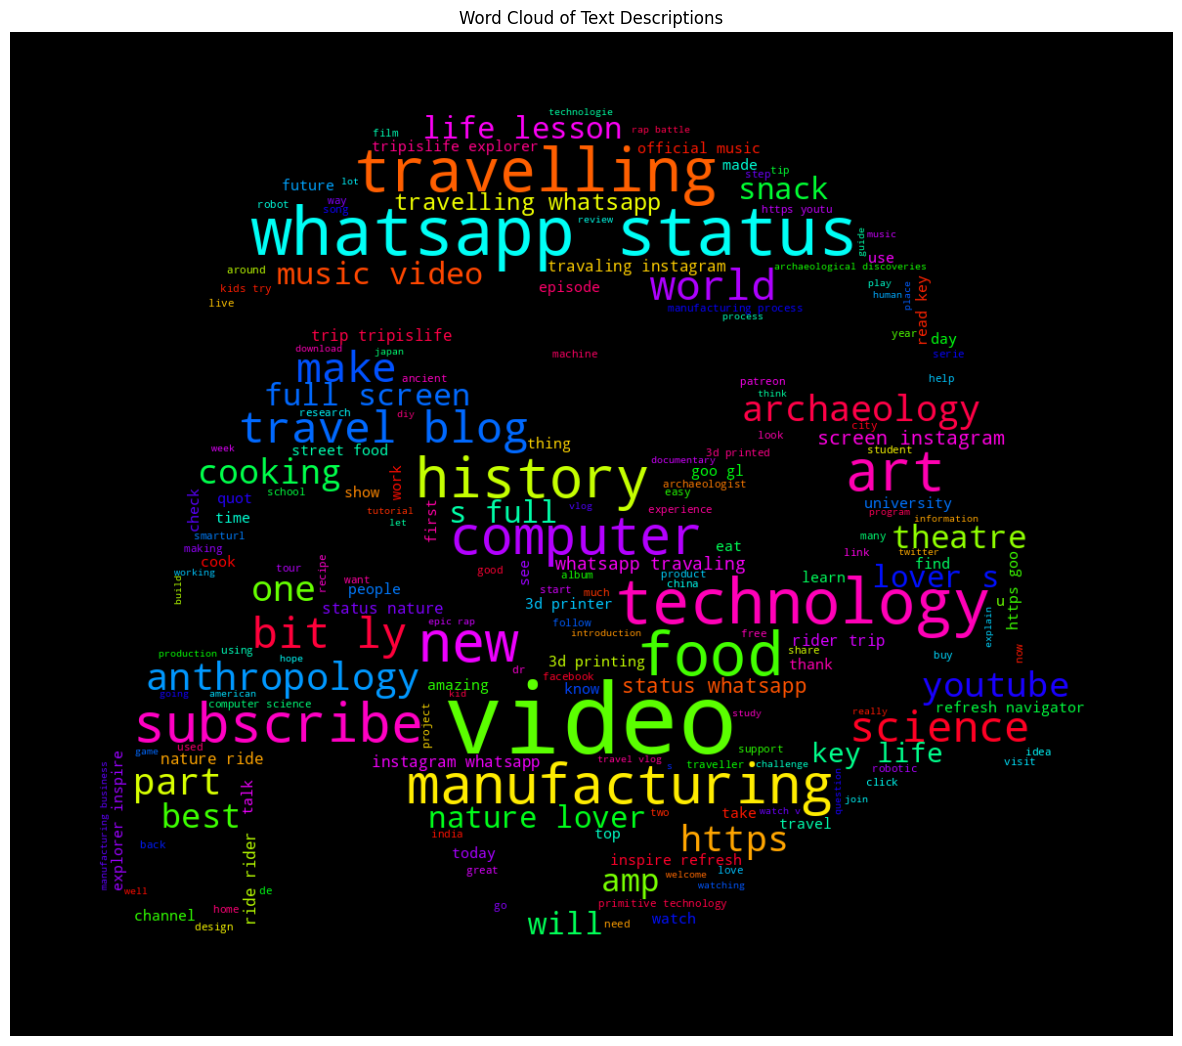

In [15]:
text = ' '.join(df['text'].dropna().str.lower())

custom_stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=800, height=800,background_color='black',colormap="hsv",mask=mask,stopwords=custom_stopwords,
                      min_font_size=10).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Descriptions')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


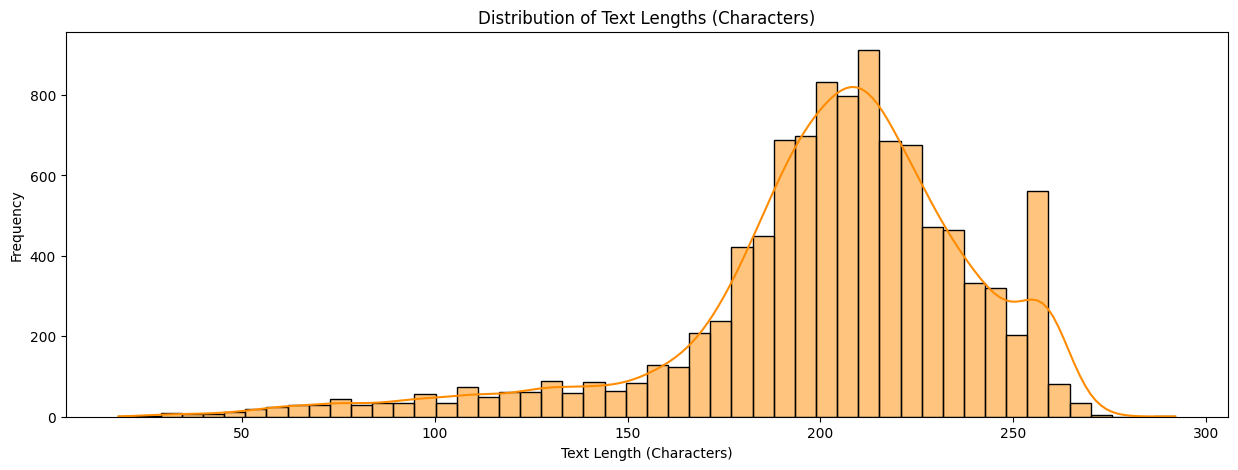

In [16]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(15, 5))
sns.histplot(df['text_length'], bins=50, kde=True,color="darkorange")
plt.title('Distribution of Text Lengths (Characters)')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


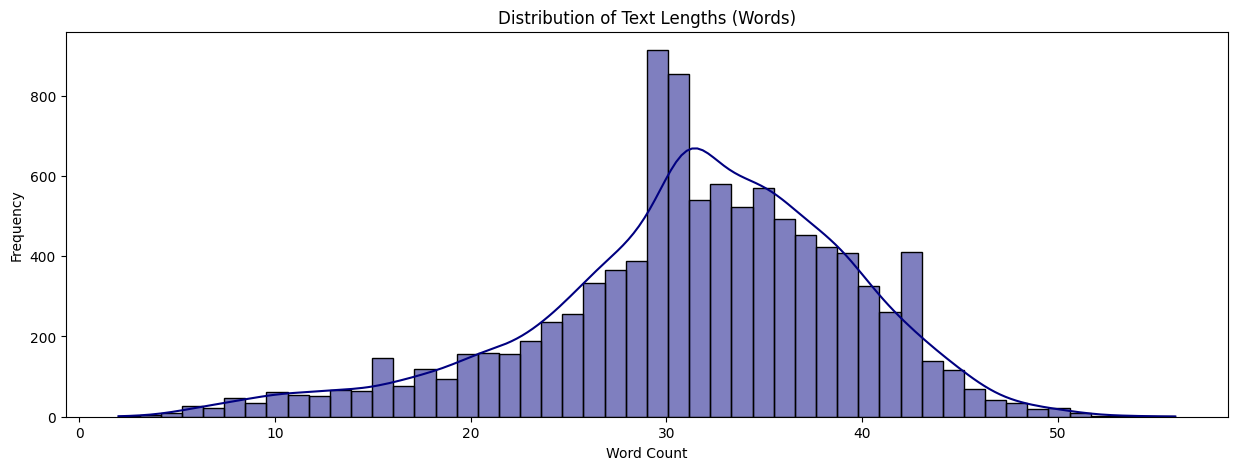

In [17]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(15, 5))
sns.histplot(df['word_count'], bins=50, kde=True,color="navy")
plt.title('Distribution of Text Lengths (Words)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

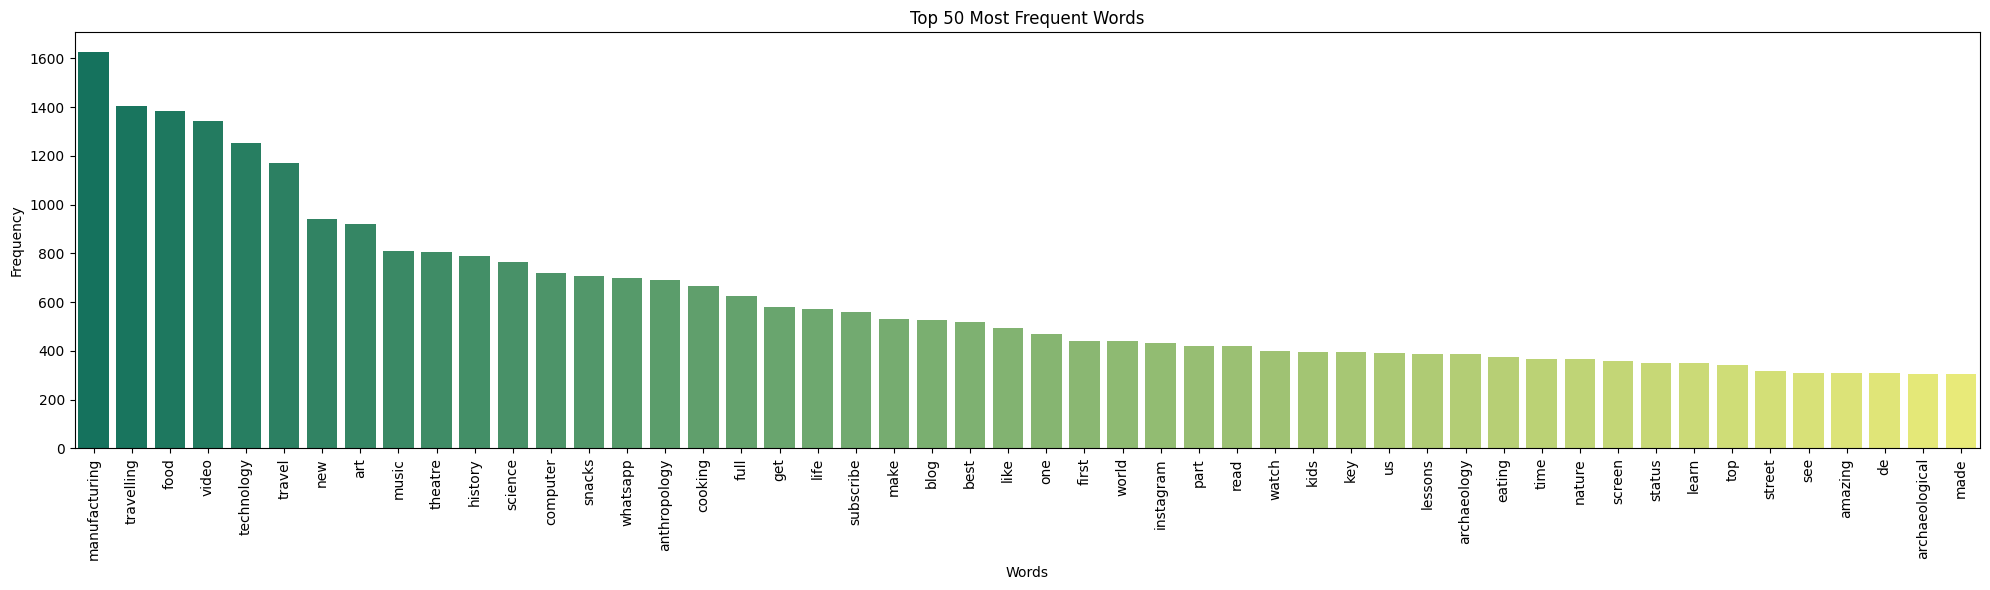

In [18]:
all_words = ' '.join(df['text'].dropna().str.lower()).split()
words = [word for word in all_words if word.isalpha() and word not in stop_words]
word_freq = pd.Series(words).value_counts().head(50).reset_index()
word_freq.columns = ['word', 'frequency']

plt.figure(figsize=(20, 6))
sns.barplot(data=word_freq, x='word', y='frequency', palette='summer')
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

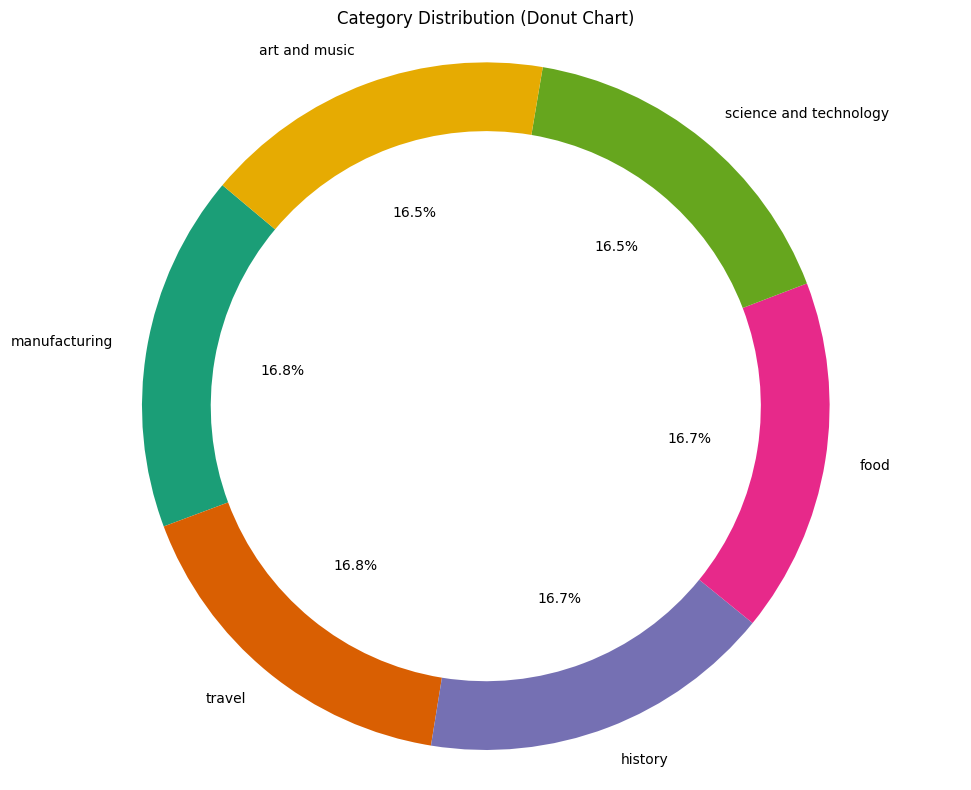

In [19]:
category_counts = df['Category'].value_counts()
labels = category_counts.index
sizes = category_counts.values
colors = sns.color_palette('Dark2', len(labels))  

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width': 0.2})
plt.title('Category Distribution (Donut Chart)')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [20]:
df["character_count"]=df["text"].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

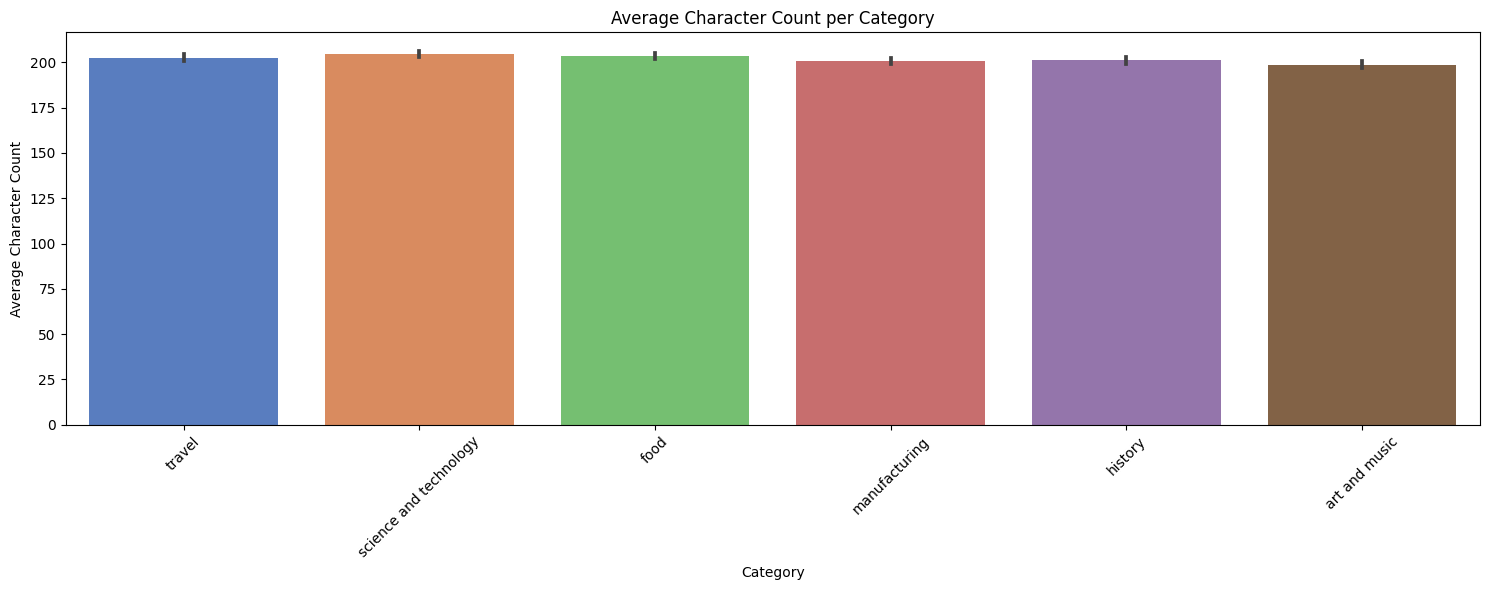

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='character_count', data=df, estimator='mean', palette='muted')
plt.title('Average Character Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Character Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

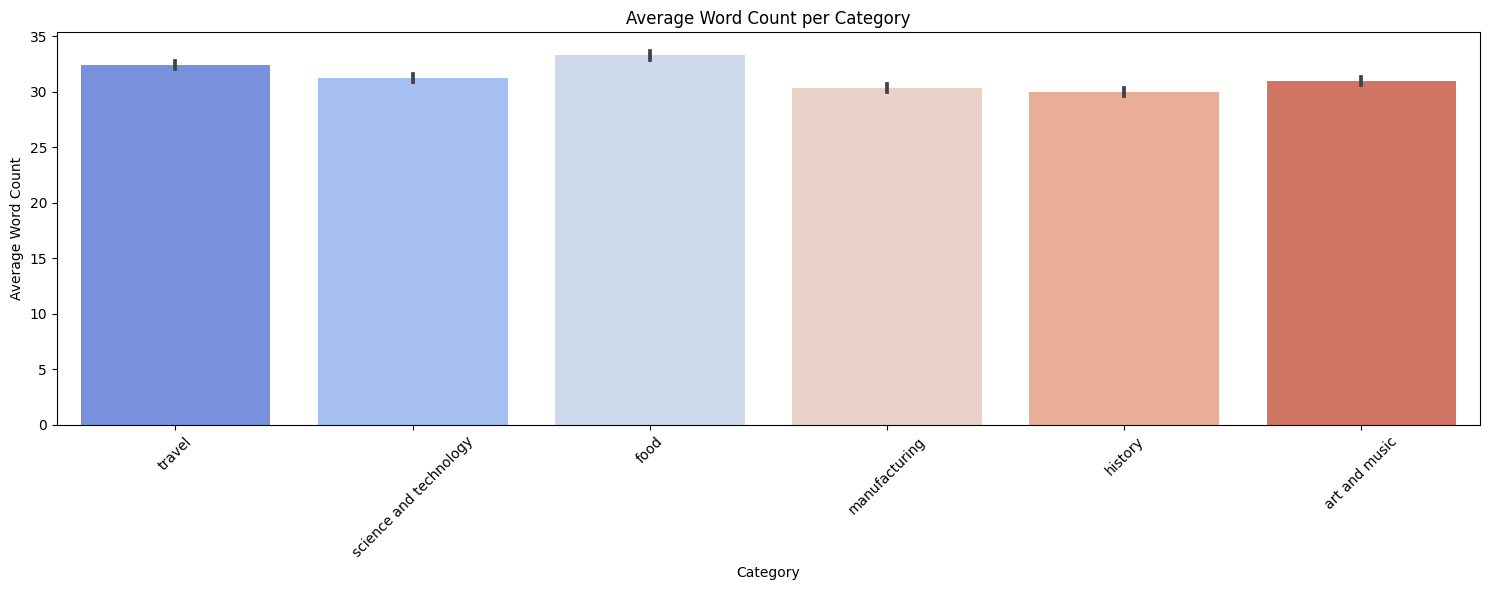

In [22]:
df['word_count'] = df['text'].str.split().str.len()

plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='word_count', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Word Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

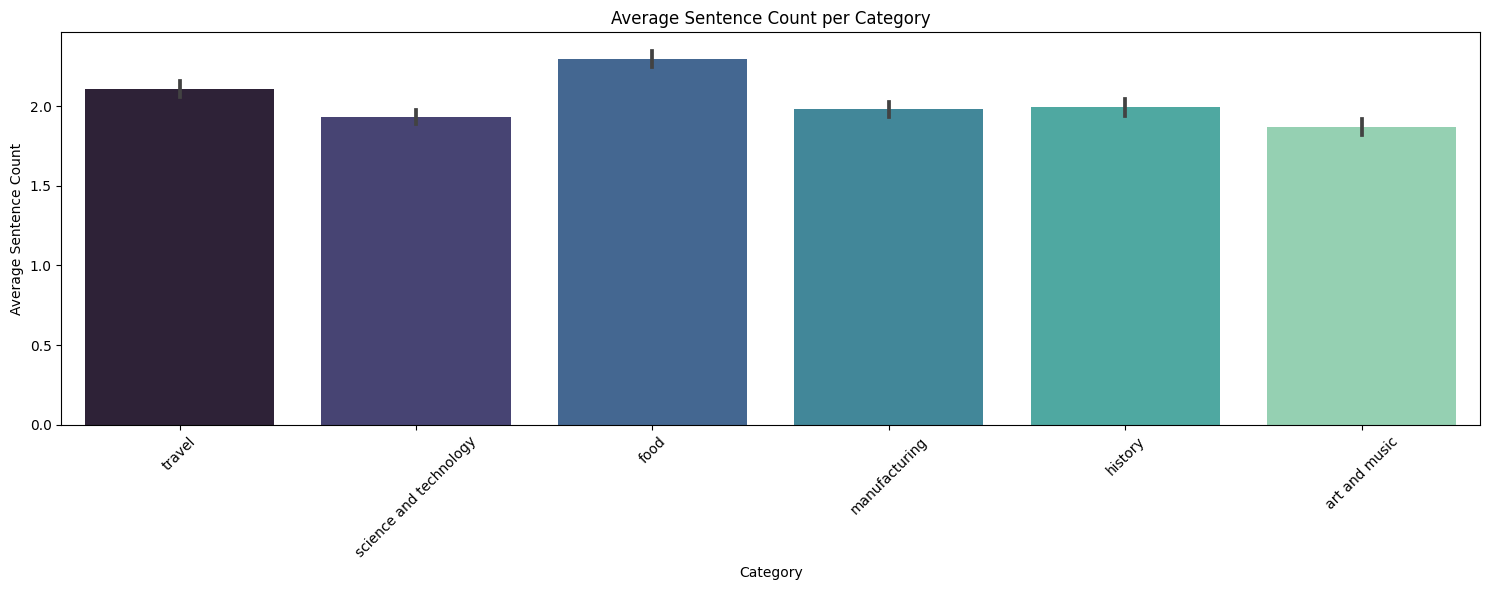

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Category', y='sentence_count', data=df, estimator='mean', palette='mako')
plt.title('Average Sentence Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Sentence Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

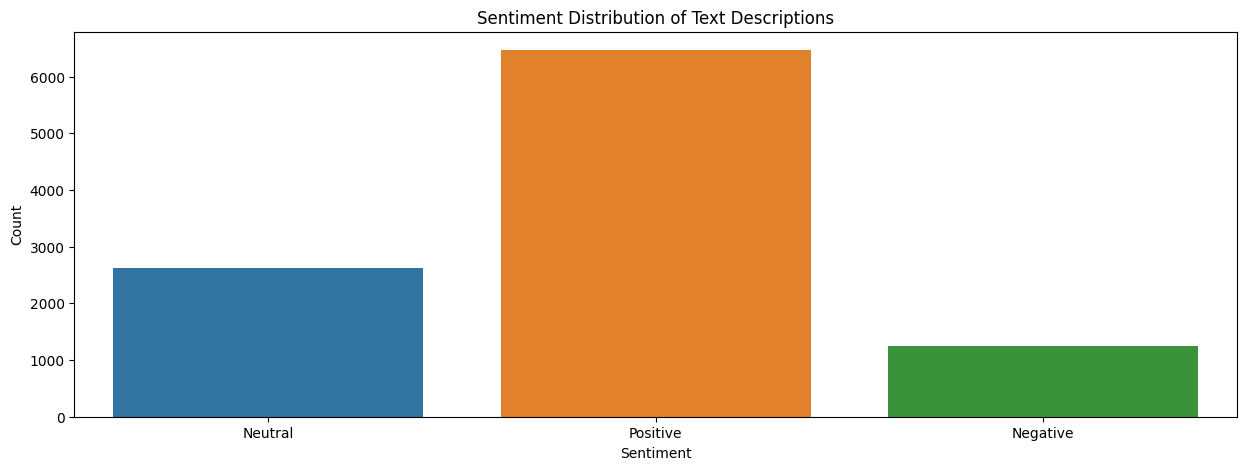

In [24]:
from textblob import TextBlob
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
plt.figure(figsize=(15, 5))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution of Text Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

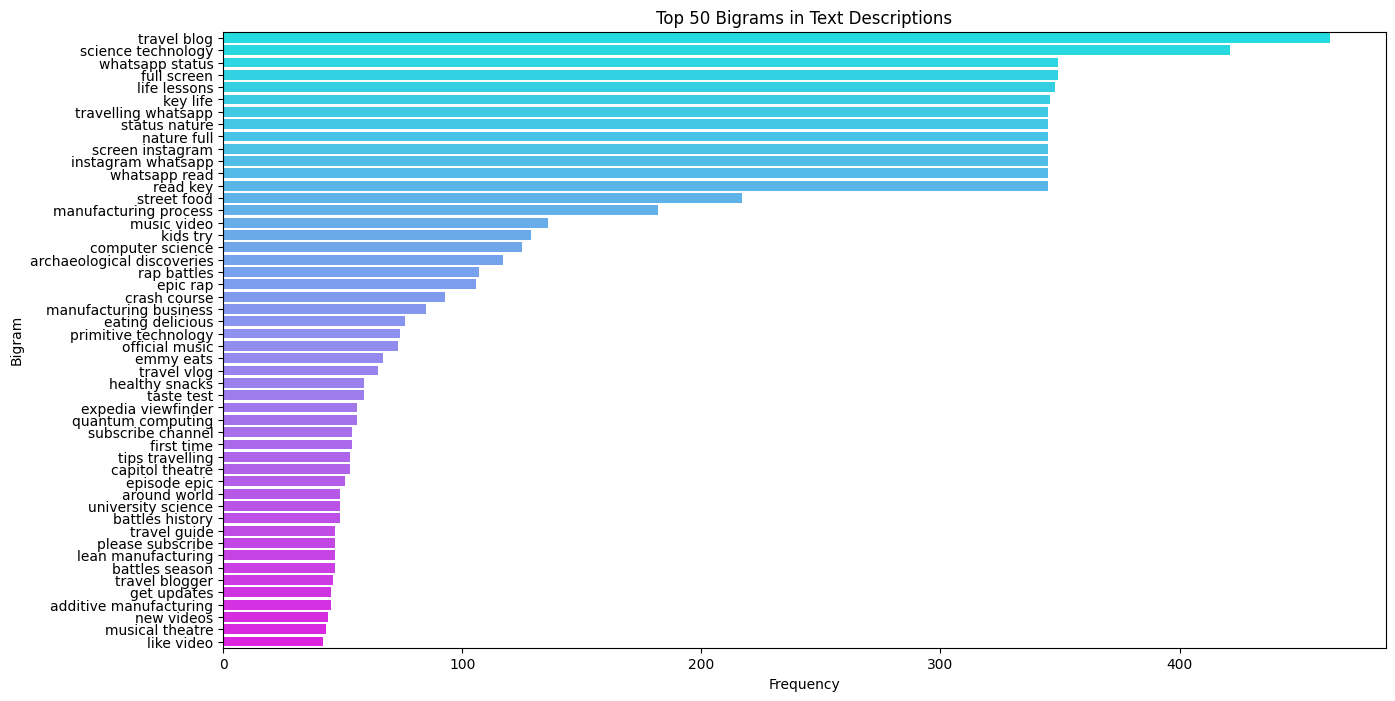

In [25]:
from nltk import ngrams
from collections import Counter


all_words = ' '.join(df['text'].str.lower()).split()
bigrams = list(ngrams([word for word in all_words if word.isalpha() and word not in stop_words], 2))
bigram_freq = Counter(bigrams).most_common(50)
bigram_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Count'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='Bigram', data=bigram_df,palette="cool")
plt.title('Top 50 Bigrams in Text Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

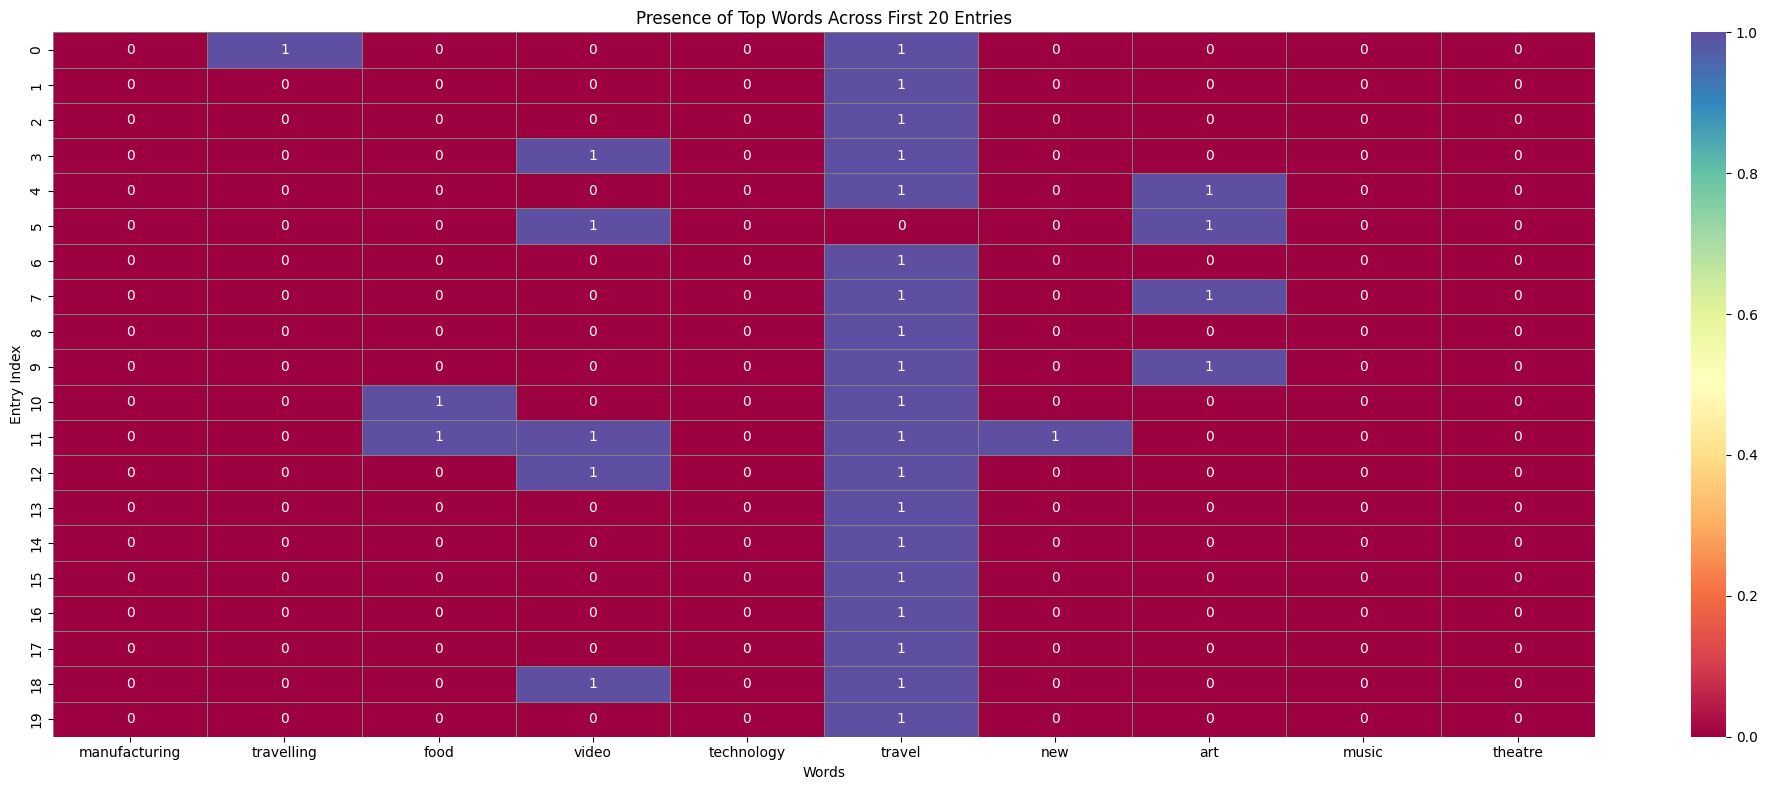

In [26]:
top_words = pd.Series(words).value_counts().head(10).index

word_matrix = pd.DataFrame(0, index=df.index, columns=top_words)
for idx, text in df['text'].dropna().items():
    text_lower = text.lower()
    for word in top_words:
        if word in text_lower:
            word_matrix.loc[idx, word] = 1

# Select first 20 rows to plot
subset = word_matrix.head(20)

plt.figure(figsize=(20, 8))
sns.heatmap(subset, annot=True, cmap='Spectral', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Presence of Top Words Across First 20 Entries')
plt.xlabel('Words')
plt.ylabel('Entry Index')
plt.tight_layout()
plt.show()


In [27]:
df.drop(columns=["text_length","word_count","character_count","sentence_count","sentiment","sentiment_label"],axis=1,inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# To check the mapping:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'art and music': 0, 'food': 1, 'history': 2, 'manufacturing': 3, 'science and technology': 4, 'travel': 5}


In [29]:
label_name=["Art and Music","Food","History","Manufacturing","Science and Technology","Travel"]

In [30]:
stop_words = set(stopwords.words('english'))
lmtzr = WordNetLemmatizer()

def pre_process(text):
    # Lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove hashtags (keep the word or discard completely)
    text = re.sub(r'#\w+', '', text)

    # Remove digits and special characters
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Tokenize
    words = text.split()

    # Remove stopwords and words with less than 3 characters
    words = [word for word in words if word not in stop_words and len(word) >= 3]

    # Lemmatize
    words = [lmtzr.lemmatize(word, "v") for word in words]

    return ' '.join(words)

# Apply with tqdm progress bar
tqdm.pandas(desc="Preprocessing text")
df['text'] = df['text'].progress_apply(pre_process)

Preprocessing text: 100%|██████████| 10333/10333 [00:03<00:00, 3021.59it/s]


In [31]:
df.head()

,Category,text
0,5,travel north east india arunachal journey begi...
1,5,travel much earn money subscribe https goo det...
2,5,travel vlog welcome bali priscilla lee chance ...
3,5,goa travel diary four days goa travel outfit i...
4,5,step become travel blogger travel blogger nikk...


In [32]:
from transformers import AutoTokenizer, TFBertModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

I0000 00:00:1752342475.786204      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertFo

In [33]:
num_labels = len(le.classes_) 
from sklearn.model_selection import train_test_split


In [34]:
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['Category'])
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42, stratify=train_val_df['Category'])

print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Train set size: 7232
Validation set size: 1551
Test set size: 1550


In [35]:
def Create_BERT_Model(max_len, num_labels):
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

    bert_output = bert_model(input_ids=input_ids, attention_mask=attention_mask)[0]  # (None, max_len, hidden_size)

    conv = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(bert_output)
    pooled = tf.keras.layers.GlobalMaxPooling1D()(conv)
    dense_1 = tf.keras.layers.Dense(256, activation='tanh')(pooled)
    dense_2 = tf.keras.layers.Dense(128, activation='tanh')(dense_1)
    dense_3 = tf.keras.layers.Dense(64, activation='tanh')(dense_2)
    dropout = tf.keras.layers.Dropout(0.2)(dense_3)
    output_layer = tf.keras.layers.Dense(num_labels, activation='softmax')(dropout)

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer)
    return model

max_len = 128
 
model = Create_BERT_Model(max_len, num_labels)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                       

In [36]:
# Tokenize function
def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts.tolist(),max_length=max_length,padding="max_length",truncation=True,return_tensors='tf')

train_inputs = tokenize_texts(train_df['text'], tokenizer)
val_inputs = tokenize_texts(val_df['text'], tokenizer)
test_inputs = tokenize_texts(test_df['text'], tokenizer)

train_ids, train_masks = train_inputs['input_ids'], train_inputs['attention_mask']
val_ids, val_masks = val_inputs['input_ids'], val_inputs['attention_mask']
test_ids, test_masks = test_inputs['input_ids'], test_inputs['attention_mask']
train_labels = train_df['Category'].values
val_labels = val_df['Category'].values
test_labels = test_df['Category'].values

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_ids, 'attention_mask': train_masks}, train_labels)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_ids, 'attention_mask': val_masks}, val_labels)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_ids, 'attention_mask': test_masks}, test_labels)).batch(64)

In [37]:
# Print shapes of a single batch from each dataset
for batch in train_dataset.take(1):
    inputs, labels = batch
    print("Train input_ids shape:", inputs['input_ids'].shape)
    print("Train attention_mask shape:", inputs['attention_mask'].shape)
    print("Train labels shape:", labels.shape)

for batch in val_dataset.take(1):
    inputs, labels = batch
    print("Validation input_ids shape:", inputs['input_ids'].shape)
    print("Validation attention_mask shape:", inputs['attention_mask'].shape)
    print("Validation labels shape:", labels.shape)

for batch in test_dataset.take(1):
    inputs, labels = batch
    print("Test input_ids shape:", inputs['input_ids'].shape)
    print("Test attention_mask shape:", inputs['attention_mask'].shape)
    print("Test labels shape:", labels.shape)


Train input_ids shape: (64, 128)
Train attention_mask shape: (64, 128)
Train labels shape: (64,)
Validation input_ids shape: (64, 128)
Validation attention_mask shape: (64, 128)
Validation labels shape: (64,)
Test input_ids shape: (64, 128)
Test attention_mask shape: (64, 128)
Test labels shape: (64,)


In [38]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=3,verbose=1)

Epoch 1/3


I0000 00:00:1752342521.952498     112 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752342522.523601     110 service.cc:148] XLA service 0x78de1480c380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752342522.523964     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752342522.716711     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 [==============================] - 163s 996ms/step - loss: 0.7458 - accuracy: 0.7580 - val_loss: 0.1436 - val_accuracy: 0.9658
Epoch 2/3
113/113 [==============================] - 108s 955ms/step - loss: 0.1477 - accuracy: 0.9584 - val_loss: 0.1216 - val_accuracy: 0.9626
Epoch 3/3
113/113 [==============================] - 108s 956ms/step - loss: 0.1182 - accuracy: 0.9640 - val_loss: 0.1170 - val_accuracy: 0.9632


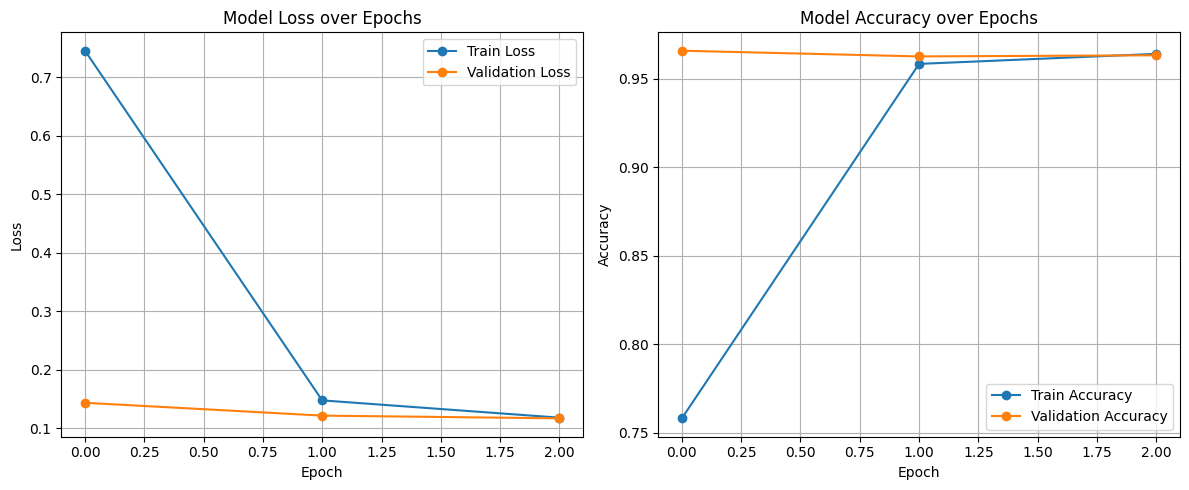

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [40]:
# Predict class probabilities
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, log_loss

pred_probs = model.predict(test_dataset)

# Convert to class labels (for classification)
pred_labels = tf.argmax(pred_probs, axis=1).numpy()

# True labels (if needed for metrics)
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

print(classification_report(true_labels, pred_labels,target_names=label_name))

25/25 [==============================] - 11s 293ms/step
                        precision    recall  f1-score   support

         Art and Music       0.99      0.95      0.97       256
                  Food       0.97      0.97      0.97       259
               History       0.99      0.94      0.96       259
         Manufacturing       0.99      0.95      0.97       260
Science and Technology       0.97      0.95      0.96       256
                Travel       0.85      0.98      0.91       260

              accuracy                           0.96      1550
             macro avg       0.96      0.96      0.96      1550
          weighted avg       0.96      0.96      0.96      1550



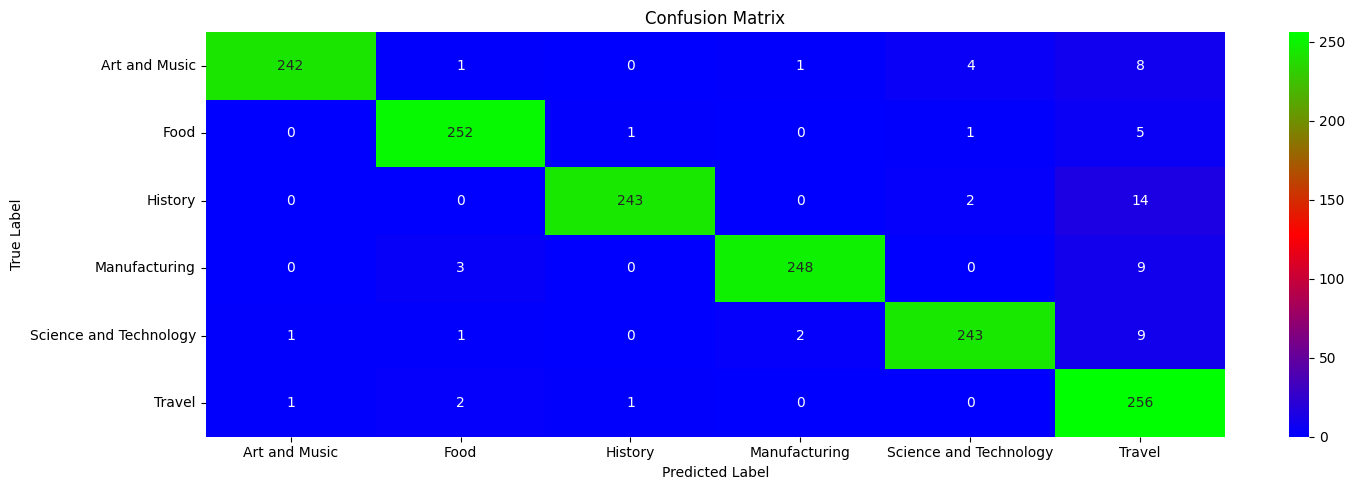

In [41]:
label_name=["Art and Music","Food","History","Manufacturing","Science and Technology","Travel"]
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='brg', xticklabels=label_name, yticklabels=label_name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

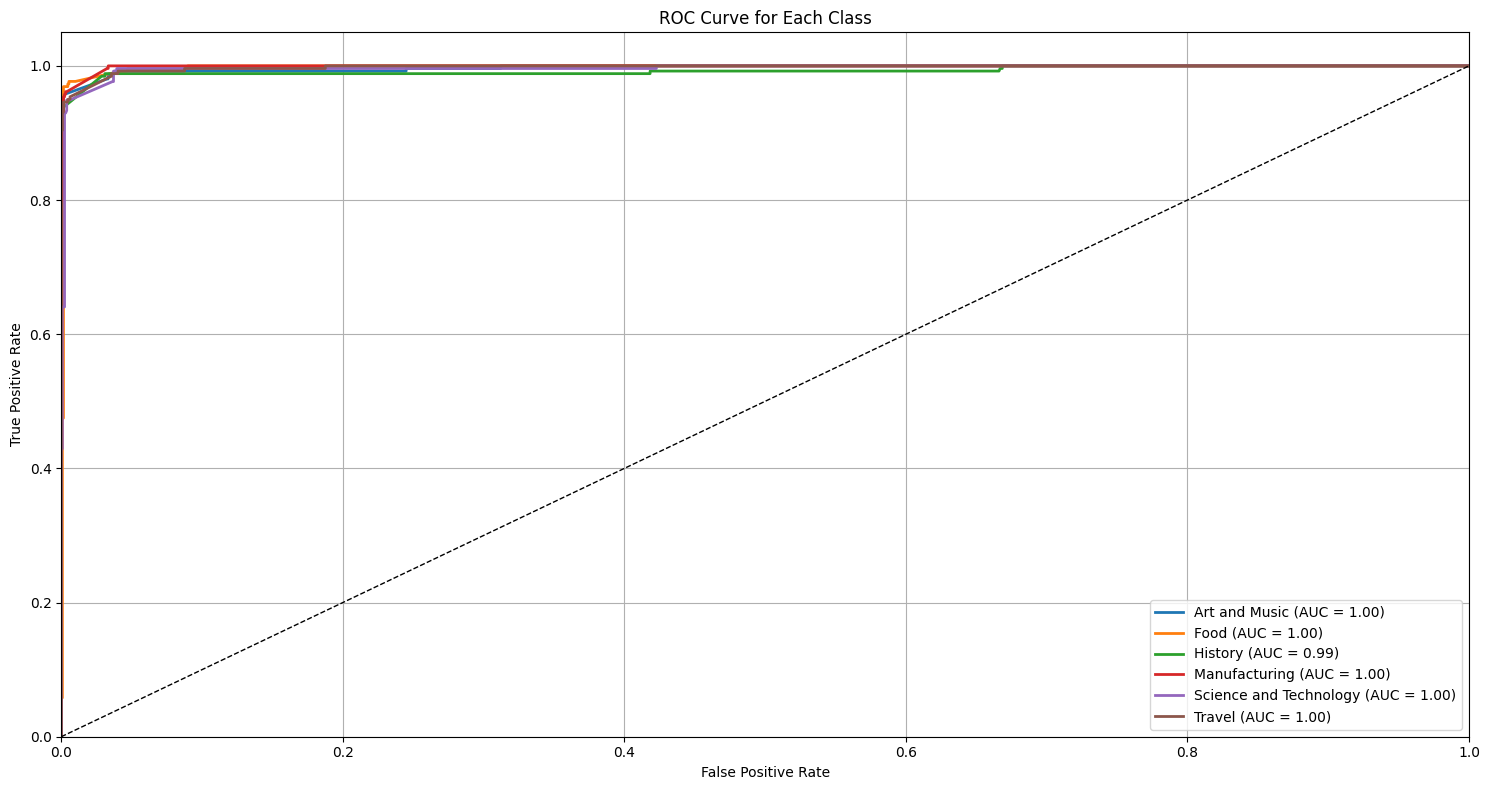

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


n_classes = len(label_name)
true_labels_bin = label_binarize(true_labels, classes=range(n_classes))

plt.figure(figsize=(15, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label_name[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


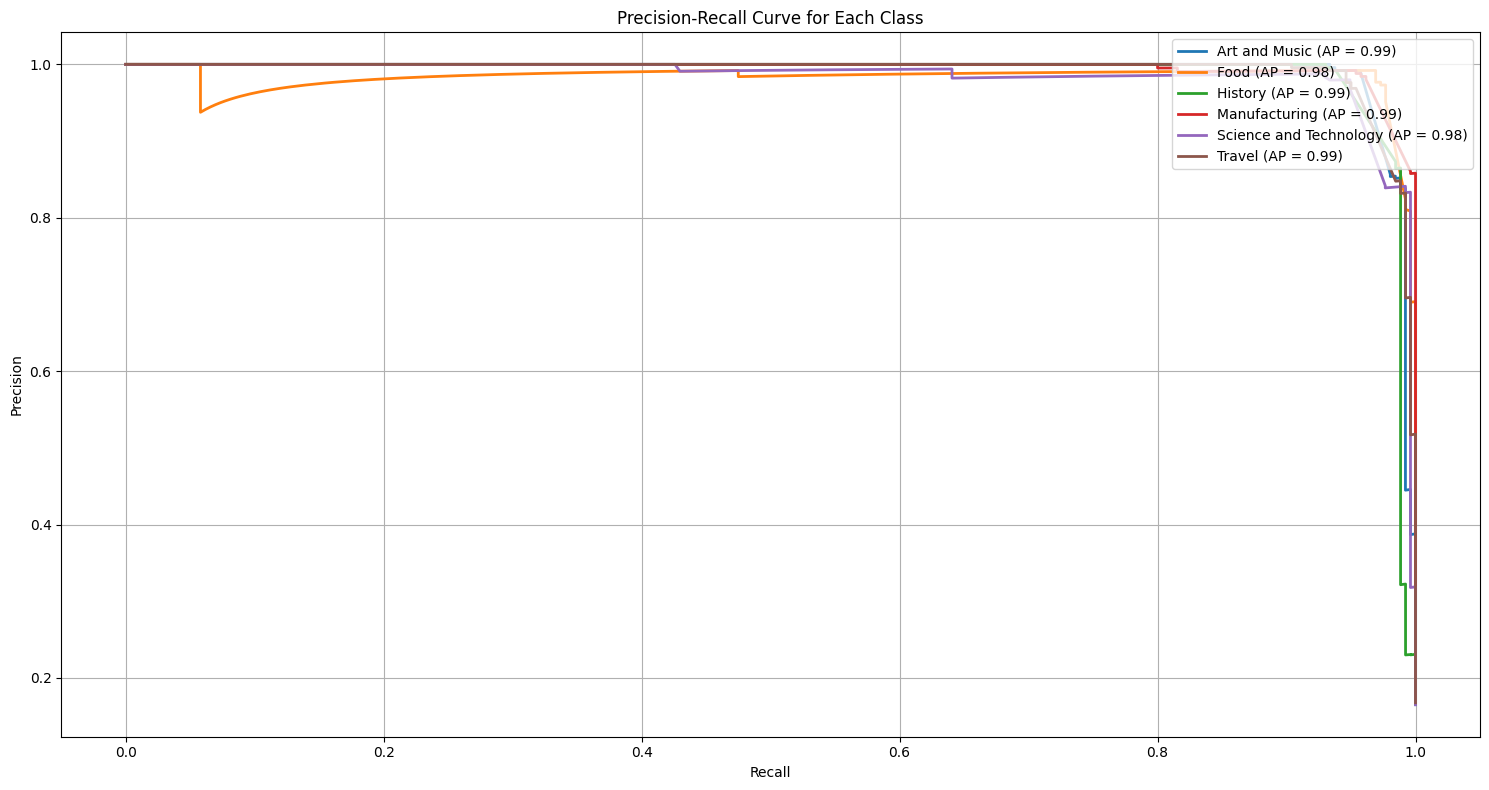

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

n_classes = len(label_name)
true_labels_bin = label_binarize(true_labels, classes=range(n_classes))

plt.figure(figsize=(15, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], pred_probs[:, i])
    avg_precision = average_precision_score(true_labels_bin[:, i], pred_probs[:, i])
    plt.plot(recall, precision, lw=2, label=f'{label_name[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()



=== Custom Text Predictions ===
1/1 [==============================] - 4s 4s/step

=== Prediction for Text 1 ===
Input Text: Exploring the vibrant street art scene in Berlin was an incredible experience!
Predicted Class: Art and Music
Class Probabilities:
  Art and Music: 0.8996
  Food: 0.0115
  History: 0.0204
  Manufacturing: 0.0154
  Science and Technology: 0.0225
  Travel: 0.0307

=== Prediction for Text 2 ===
Input Text: The new recipe for homemade pasta with truffle sauce was absolutely delicious.
Predicted Class: Food
Class Probabilities:
  Art and Music: 0.0041
  Food: 0.9635
  History: 0.0087
  Manufacturing: 0.0046
  Science and Technology: 0.0128
  Travel: 0.0062

=== Prediction for Text 3 ===
Input Text: The history of the Roman Empire is fascinating, especially the rise and fall of its emperors.
Predicted Class: History
Class Probabilities:
  Art and Music: 0.0253
  Food: 0.0223
  History: 0.8777
  Manufacturing: 0.0153
  Science and Technology: 0.0322
  Travel: 0.0272

=

/tmp/ipykernel_36/1541770355.py:60: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


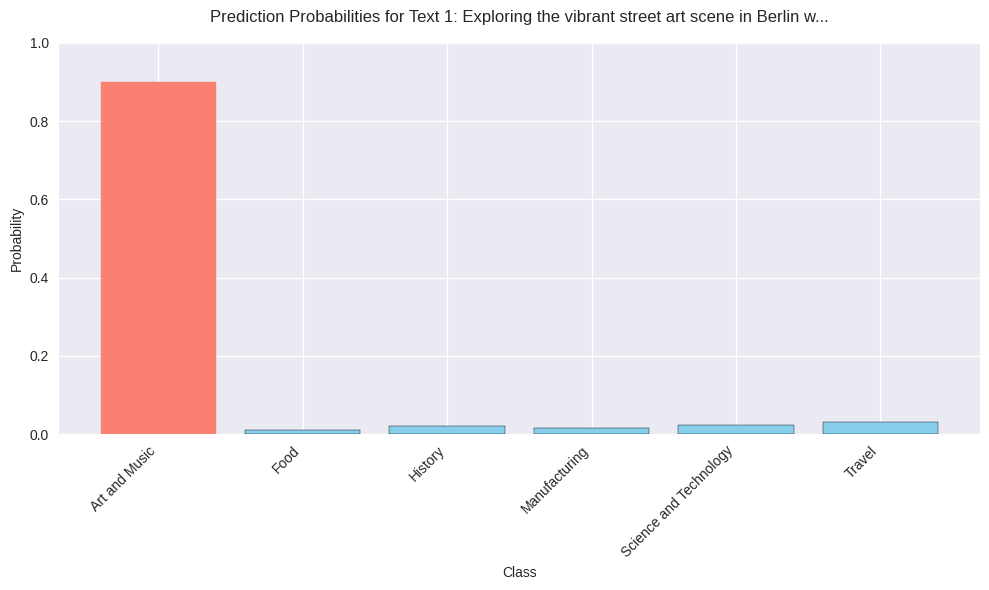

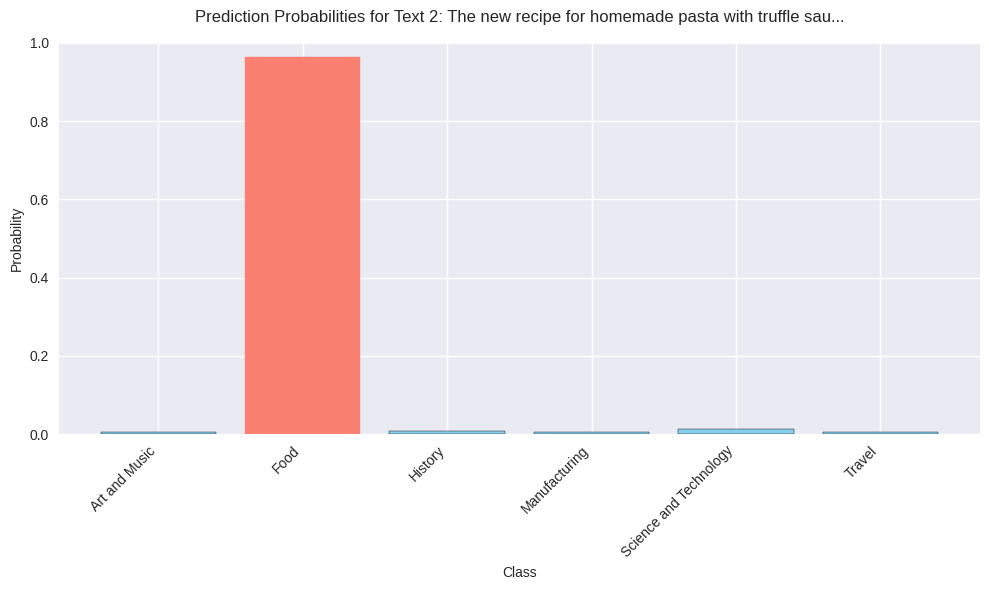

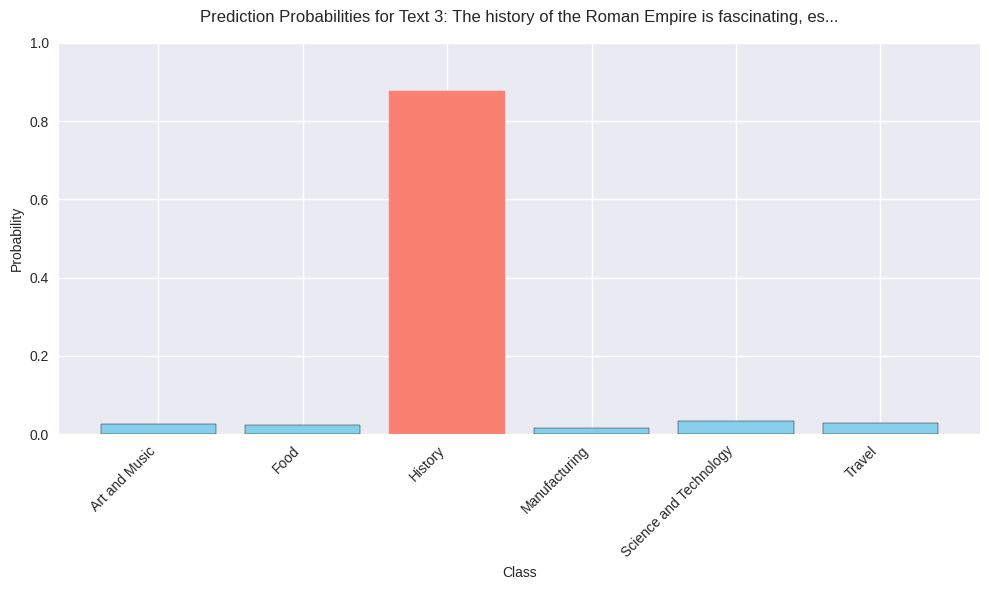

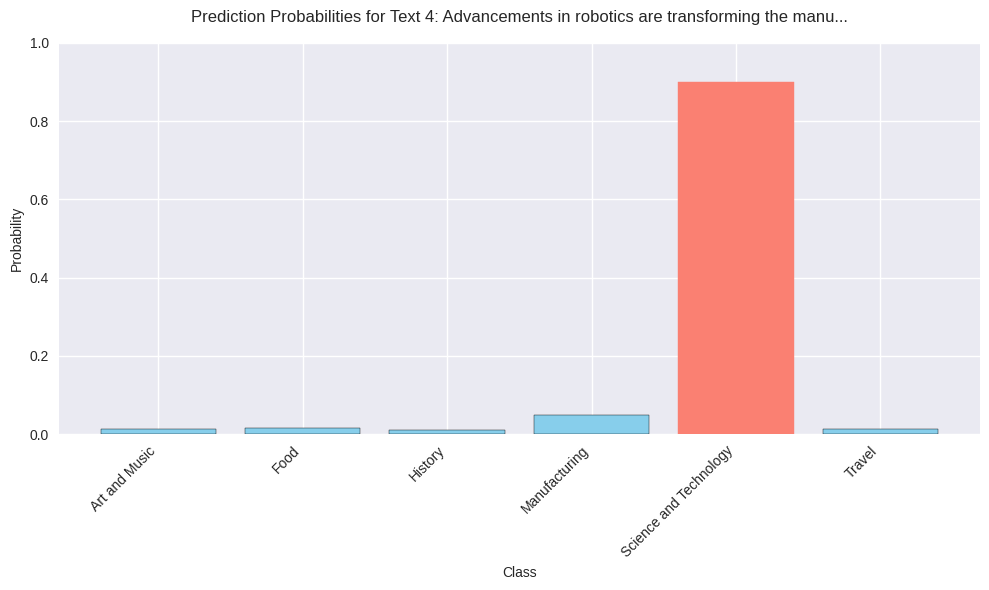

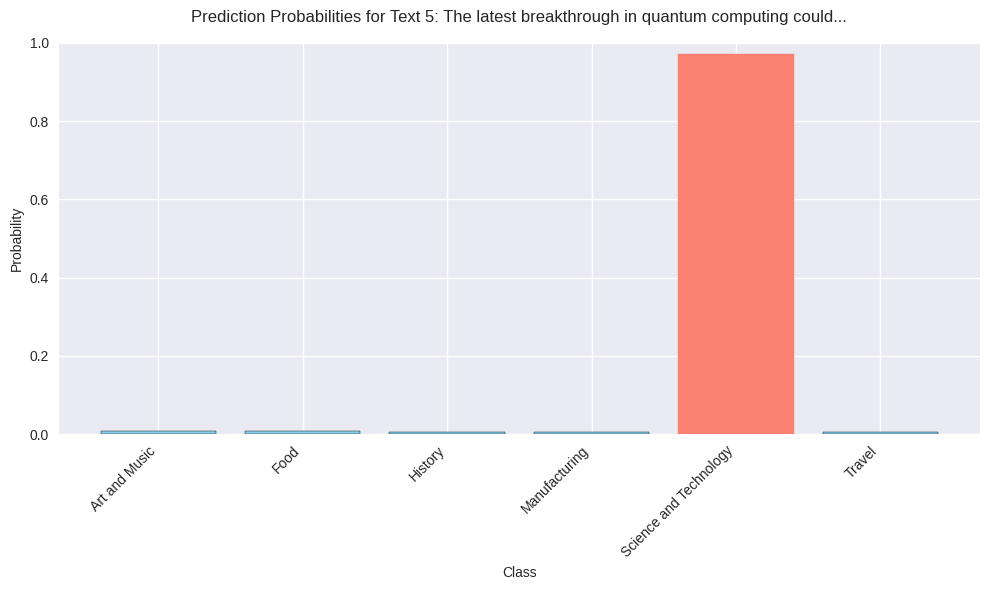

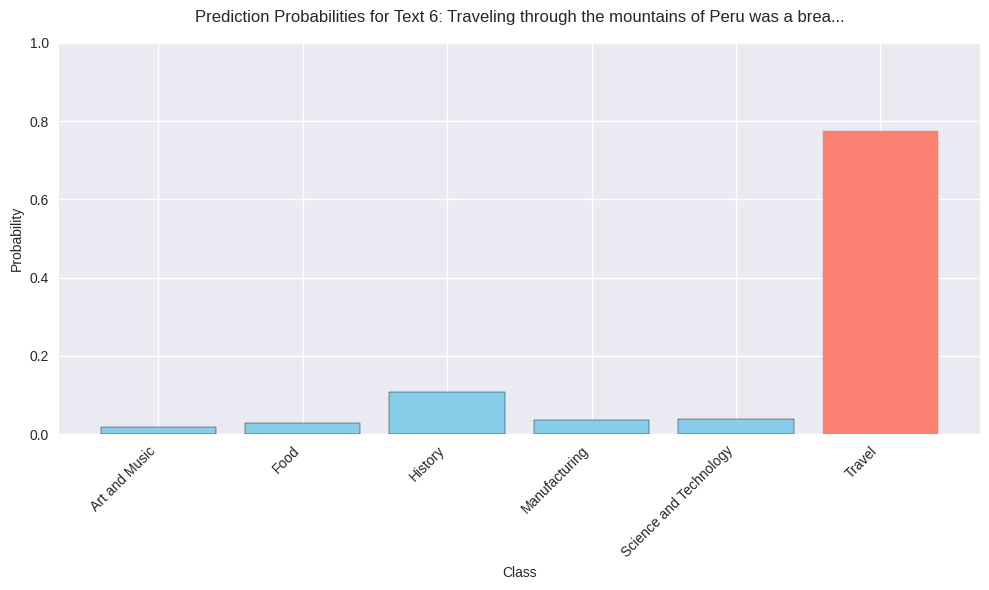

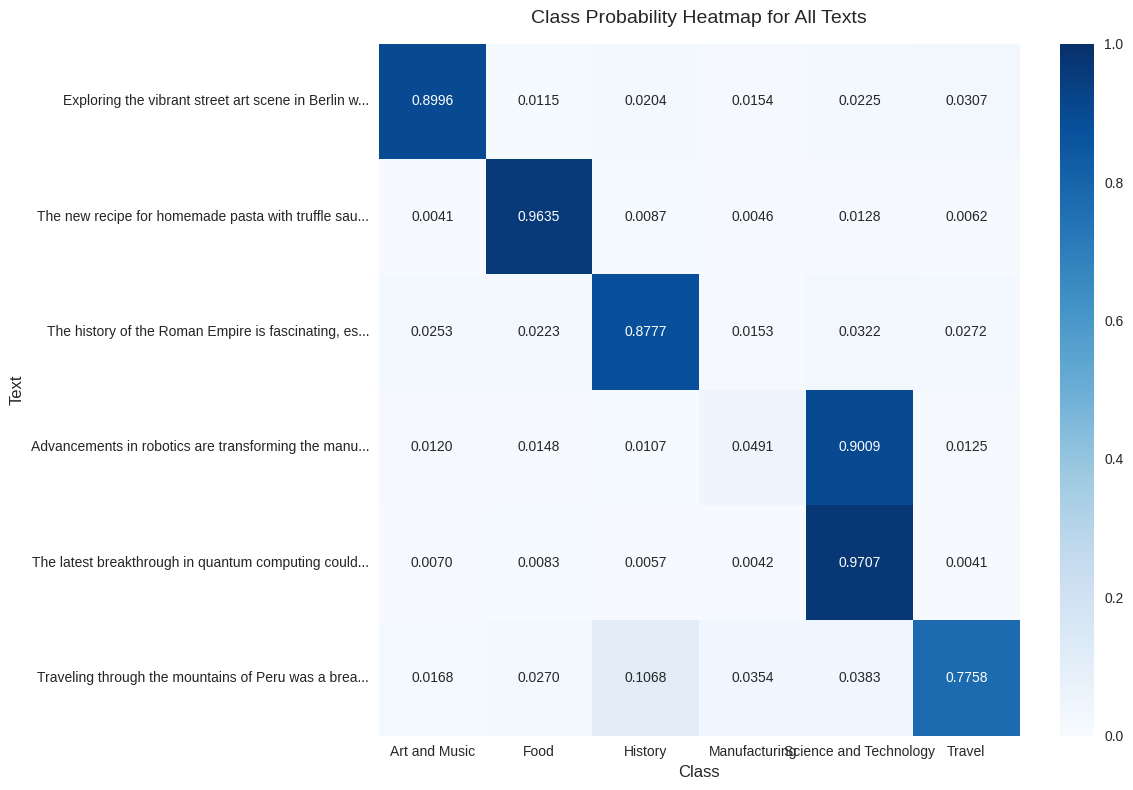

In [44]:
import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the following from your previous code:
# - model: Trained BERT model
# - max_len: 128
# - label_name: List of class names
label_name = ["Art and Music", "Food", "History", "Manufacturing", "Science and Technology", "Travel"]

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def predict_custom_text(texts, model, tokenizer, max_len=128, label_name=None):
    # Tokenize the input texts
    inputs = tokenizer(
        texts if isinstance(texts, list) else [texts],
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

    # Prepare inputs for the model
    input_dict = {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask']
    }

    # Predict probabilities
    probs = model.predict(input_dict)
    # Convert probabilities to class labels
    pred_labels = tf.argmax(probs, axis=1).numpy()

    # Store predictions
    predictions = []
    for i, text in enumerate(texts if isinstance(texts, list) else [texts]):
        pred_dict = {
            'Text': text[:50] + "..." if len(text) > 50 else text,  # Truncate for display
            'Predicted Class': label_name[pred_labels[i]],
            'Probabilities': {label: prob for label, prob in zip(label_name, probs[i])}
        }
        predictions.append(pred_dict)

        # Print predictions
        print(f"\n=== Prediction for Text {i+1} ===")
        print(f"Input Text: {text}")
        print(f"Predicted Class: {label_name[pred_labels[i]]}")
        print("Class Probabilities:")
        for label, prob in zip(label_name, probs[i]):
            print(f"  {label}: {prob:.4f}")

    return pred_labels, probs, predictions

def plot_predictions(predictions, label_name):
    # Set style for better visuals
    plt.style.use('seaborn')

    # Plot bar plot for each text
    for i, pred in enumerate(predictions):
        text = pred['Text']
        probs = list(pred['Probabilities'].values())
        predicted_class = pred['Predicted Class']

        plt.figure(figsize=(10, 6))
        bars = plt.bar(label_name, probs, color='skyblue', edgecolor='black')
        plt.title(f'Prediction Probabilities for Text {i+1}: {text}', fontsize=12, pad=15)
        plt.xlabel('Class', fontsize=10)
        plt.ylabel('Probability', fontsize=10)
        plt.ylim(0, 1)
        plt.xticks(rotation=45, ha='right')

        # Highlight the predicted class
        bars[label_name.index(predicted_class)].set_color('salmon')

        plt.tight_layout()
        plt.show()

    # If multiple texts, plot a heatmap
    if len(predictions) > 1:
        # Create a DataFrame for probabilities
        prob_matrix = np.array([list(pred['Probabilities'].values()) for pred in predictions])
        df_probs = pd.DataFrame(prob_matrix, columns=label_name, index=[pred['Text'] for pred in predictions])

        plt.figure(figsize=(12, 8))
        sns.heatmap(df_probs, annot=True, cmap='Blues', vmin=0, vmax=1, fmt='.4f')
        plt.title('Class Probability Heatmap for All Texts', fontsize=14, pad=15)
        plt.xlabel('Class', fontsize=12)
        plt.ylabel('Text', fontsize=12)
        plt.tight_layout()
        plt.show()

# Example custom texts for prediction
custom_texts = [
    "Exploring the vibrant street art scene in Berlin was an incredible experience!",
    "The new recipe for homemade pasta with truffle sauce was absolutely delicious.",
    "The history of the Roman Empire is fascinating, especially the rise and fall of its emperors.",
    "Advancements in robotics are transforming the manufacturing industry.",
    "The latest breakthrough in quantum computing could revolutionize technology.",
    "Traveling through the mountains of Peru was a breathtaking adventure."
]

# Predict and visualize
print("\n=== Custom Text Predictions ===")
pred_labels, pred_probs, predictions = predict_custom_text(custom_texts, model, tokenizer, max_len=128, label_name=label_name)
plot_predictions(predictions, label_name)

In [45]:
pred_probs = model.predict(test_dataset)  
pred_labels = np.argmax(pred_probs, axis=1)
# Compute metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f1 = f1_score(true_labels, pred_labels, average='macro')
mcc = matthews_corrcoef(true_labels, pred_labels)
kappa = cohen_kappa_score(true_labels, pred_labels)

print(f"Accuracy Score           : {accuracy:.4f}")
print(f"Precision (Macro Avg)    : {precision:.4f}")
print(f"Recall (Macro Avg)       : {recall:.4f}")
print(f"F1 Score (Macro Avg)     : {f1:.4f}")
print(f"Matthews Corrcoef        : {mcc:.4f}")
print(f"Cohen’s Kappa Score      : {kappa:.4f}")


25/25 [==============================] - 7s 292ms/step
Accuracy Score           : 0.9574
Precision (Macro Avg)    : 0.9612
Recall (Macro Avg)       : 0.9574
F1 Score (Macro Avg)     : 0.9582
Matthews Corrcoef        : 0.9494
Cohen’s Kappa Score      : 0.9489


In [46]:
model.save("bert_classification_model")


In [48]:
import shutil

# Compress the entire model folder into a .zip file
shutil.make_archive('/kaggle/working/bert_classification_model', 'zip', '/kaggle/working/bert_classification_model')


'/kaggle/working/bert_classification_model.zip'

In [47]:
! pip freeze

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb